# [Notebook 08] Regression

__Building a neural network for regression with KaiTorch.__

Note: these notebooks aren't meant to showcase best practices in data processing or training neural networks, it's simply meant as a quick and easy way to showcase a working neural network 🙂

## Dataset

For our dataset, we'll sample our data from this simple "slope", with some added noise.

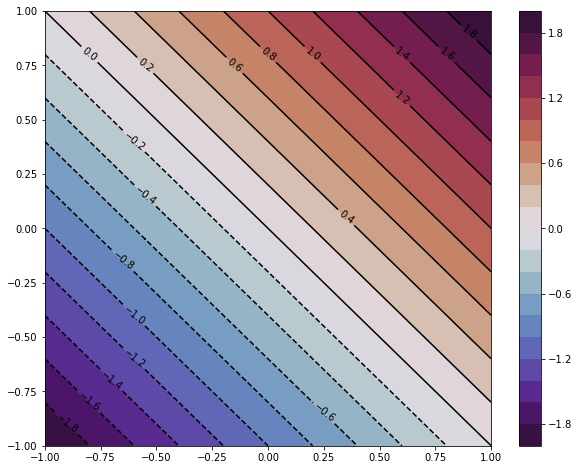

In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

def fx(x0, x1):
    slope = x0+x1
    return slope

x0_grid = np.linspace(-1, 1, 41)
x1_grid = np.linspace(-1, 1, 41)
x0_grid, x1_grid = np.meshgrid(x0_grid, x1_grid)
y_grid = fx(x0_grid, x1_grid)

plt.figure(figsize=(10, 8))

ctr = plt.contour(x0_grid, x1_grid, y_grid, levels=21, colors='black')
fil = plt.contourf(x0_grid, x1_grid, y_grid, levels=21, cmap='twilight_shifted')

plt.clabel(ctr)
plt.colorbar(fil)
plt.show()

To make things slightly more interesting, we'll also generate addition features `x0_sin`, `x1_sin`, `x0_squared`, and `x1_squared`. Our model will have a total of 6 input features.

In [2]:
x0 = [random.uniform(-1, 1) for _ in range(250)]
x1 = [random.uniform(-1, 1) for _ in range(250)]

x0_sin = [np.sin(x) for x in x0]
x1_sin = [np.sin(x) for x in x1]

x0_squared = [x**2 for x in x0]
x1_squared = [x**2 for x in x1]

X = list(zip(x0, x1, x0_sin, x1_sin, x0_squared, x1_squared))
y = [fx(x0, x1) + random.gauss(0, 0.01) for (x0, x1, x0_sin, x1_sin, x0_squared, x1_squared) in X]

## Building a Neural Net

In [3]:
from kaitorch.models import Sequential
from kaitorch.layers import Dense, Dropout
from kaitorch.optimizers import Adam
from kaitorch.losses import MeanSquaredError

In [4]:
model = Sequential()

model.add(Dense(24, activation='ReLU', initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Dense(24, activation='ReLU', initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='ReLU', initializer='he_normal'))
model.add(Dense(1))

model.compile(
    optimizer=Adam(lr=0.007),
    loss=MeanSquaredError()
)

model.build(input_size=6)
model.summary()

___________________________________________________________________________________________________________________
Layer (params)                                                           Output Shape     Params = Weights + Biases
Dense(units=24, activation=ReLU, initializer=he_normal)                  (None, 24)       168      144       24    
___________________________________________________________________________________________________________________
Dropout(dropout_rate=0.25)                                               (None, 24)       0        0         0     
___________________________________________________________________________________________________________________
Dense(units=24, activation=ReLU, initializer=he_normal)                  (None, 24)       600      576       24    
___________________________________________________________________________________________________________________
Dropout(dropout_rate=0.25)                                              

## Training a Neural Net

In [5]:
%%time
history = model.fit(X, y, epochs=20)

Epoch  20/20: 100%|████████████████████████████████████████| 250/250 [00:20<00:00, Train Loss: 0.1638]


CPU times: user 3min 57s, sys: 43.2 s, total: 4min 40s
Wall time: 5min 28s


## Results
Visualizing the model results across a grid of `x0`, `x1` values to see how well the neural net learned the "slope".

In [6]:
x0_grid = np.linspace(-1, 1, 41)
x0_sin_grid = np.sin(x0_grid)
x0_squared_grid = x0_grid**2

x1_grid = np.linspace(-1, 1, 41)
x1_sin_grid = np.sin(x1_grid)
x1_squared_grid = x1_grid**2

x0_grid, x1_grid = np.meshgrid(x0_grid, x1_grid)
x0_sin_grid, x1_sin_grid = np.meshgrid(x0_sin_grid, x1_sin_grid)
x0_squared_grid, x1_squared_grid = np.meshgrid(x0_squared_grid, x1_squared_grid)

X = list(map(list, zip(
    x0_grid.ravel(),
    x1_grid.ravel(),
    x0_sin_grid.ravel(),
    x1_sin_grid.ravel(),
    x0_squared_grid.ravel(),
    x1_squared_grid.ravel(),
)))

y = model.predict(X)


Epoch   1/1: 100%|████████████████████████████████████████| 1681/1681 [02:31<00:00]


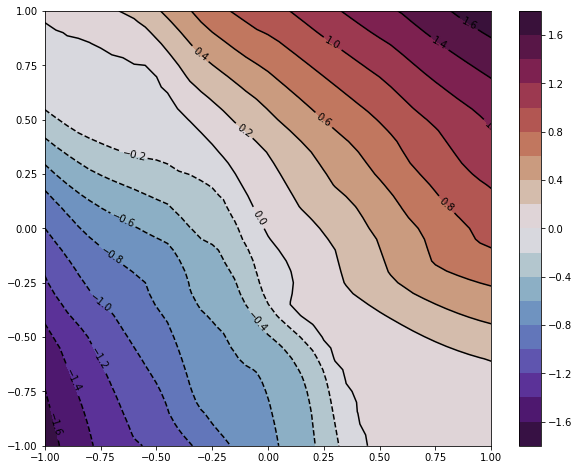

In [7]:
y_grid = np.array(y).reshape(41, 41)
plt.figure(figsize=(10, 8))

ctr = plt.contour(x0_grid, x1_grid, y_grid, levels=21, colors='black')
fil = plt.contourf(x0_grid, x1_grid, y_grid, levels=21, cmap='twilight_shifted')

plt.clabel(ctr)
plt.colorbar(fil)
plt.show()

## Tracing/Visualization

In [8]:
model.plot(filename='./imgs/regression')